<a href="https://colab.research.google.com/github/DAVIDKSOUSA/DATA_SCIENCE/blob/master/Estudo_Ibov_%26_Dolar_Correl%C3%A7%C3%B5es_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# O Pyfolio está apresentado erro com a versão 1.0 do Pandas por isso acrescentei esse código para que o Google Colab use a versão anterior. Será necessário o restart da Runtime.
!pip install pandas==0.25.3

In [2]:
# Conferindo a versão do Pandas que está sendo usada
import pandas as pd
pd.__version__

'0.25.3'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as wb

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()


Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


In [4]:
!pip install pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 92kB 4.6MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-cp36-none-any.whl size=88668 sha256=833b4d240c1cb1814e0165db499ea25a0762a6d650c9bd0e1436e57c14c78783
  Stored in directory: /root/.cache/pip/wheels/0d/a8/7d/ac33fe6bf6f3db370291c9de303460d00b8f97cc40a1d80f72
  Created wheel for empyrical: filename=empyrical-0.5.3-cp36-none-any.whl size=37087 sha256=c7f8128fb91c55fdcdd71e3597c2c0c8dd5eed51ac24328e5136d1947015960e
  Stored in directory: /root/.cache/pip/wheels/10/a4/3b/951bd609878a82fd72b9ea23699daf1eaada4ff6f583152876
Successfully built pyfolio empyrical


/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


In [5]:
#Obtendo oa dados do mercado.
bova11 = wb.get_data_yahoo("BOVA11.SA") #start="2018-01-01", and="2019-01-01")
bova11

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-06-18,55.290001,55.290001,55.290001,55.290001,55.290001,0
2012-06-19,55.849998,56.730000,55.400002,56.400002,56.400002,3759910
2012-06-20,56.400002,56.759998,55.650002,56.360001,56.360001,5550260
2012-06-21,56.360001,56.860001,54.599998,54.709999,54.709999,2050680
2012-06-22,54.910000,55.169998,54.250000,54.599998,54.599998,1805320
...,...,...,...,...,...,...
2020-04-22,76.000000,78.250000,75.989998,77.699997,77.699997,11503000
2020-04-23,78.360001,78.730003,75.650002,76.650002,76.650002,12990450
2020-04-24,75.400002,75.500000,69.099998,72.410004,72.410004,45899510


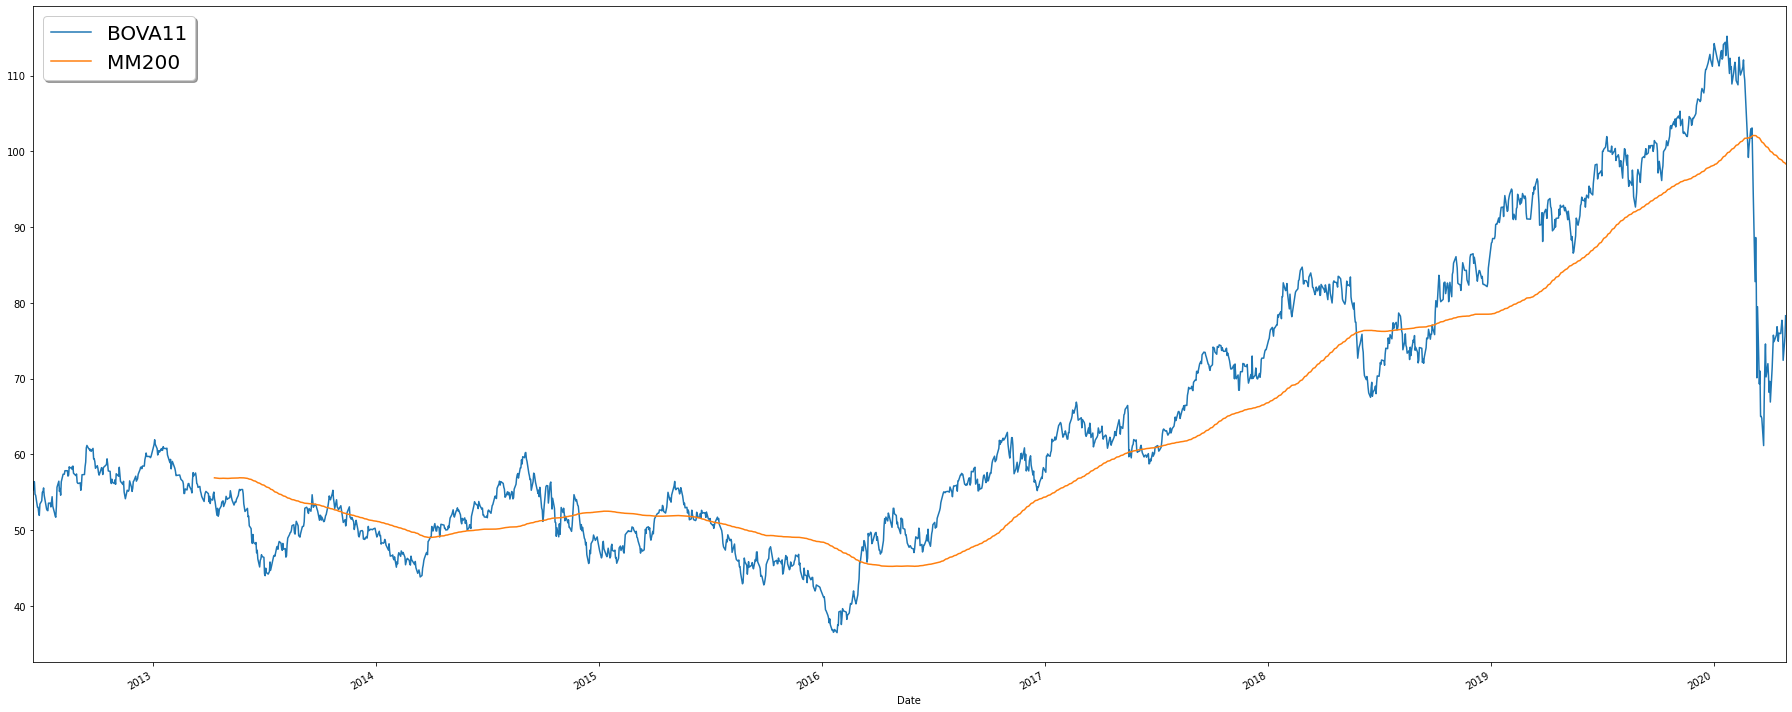

In [6]:
bova11["Adj Close"].plot(figsize=(25,10), label= "BOVA11")
bova11["Adj Close"].rolling(200).mean().plot(label ="MM200")
plt.legend(shadow=True, fontsize= 20, loc= "upper left")
plt.tight_layout();

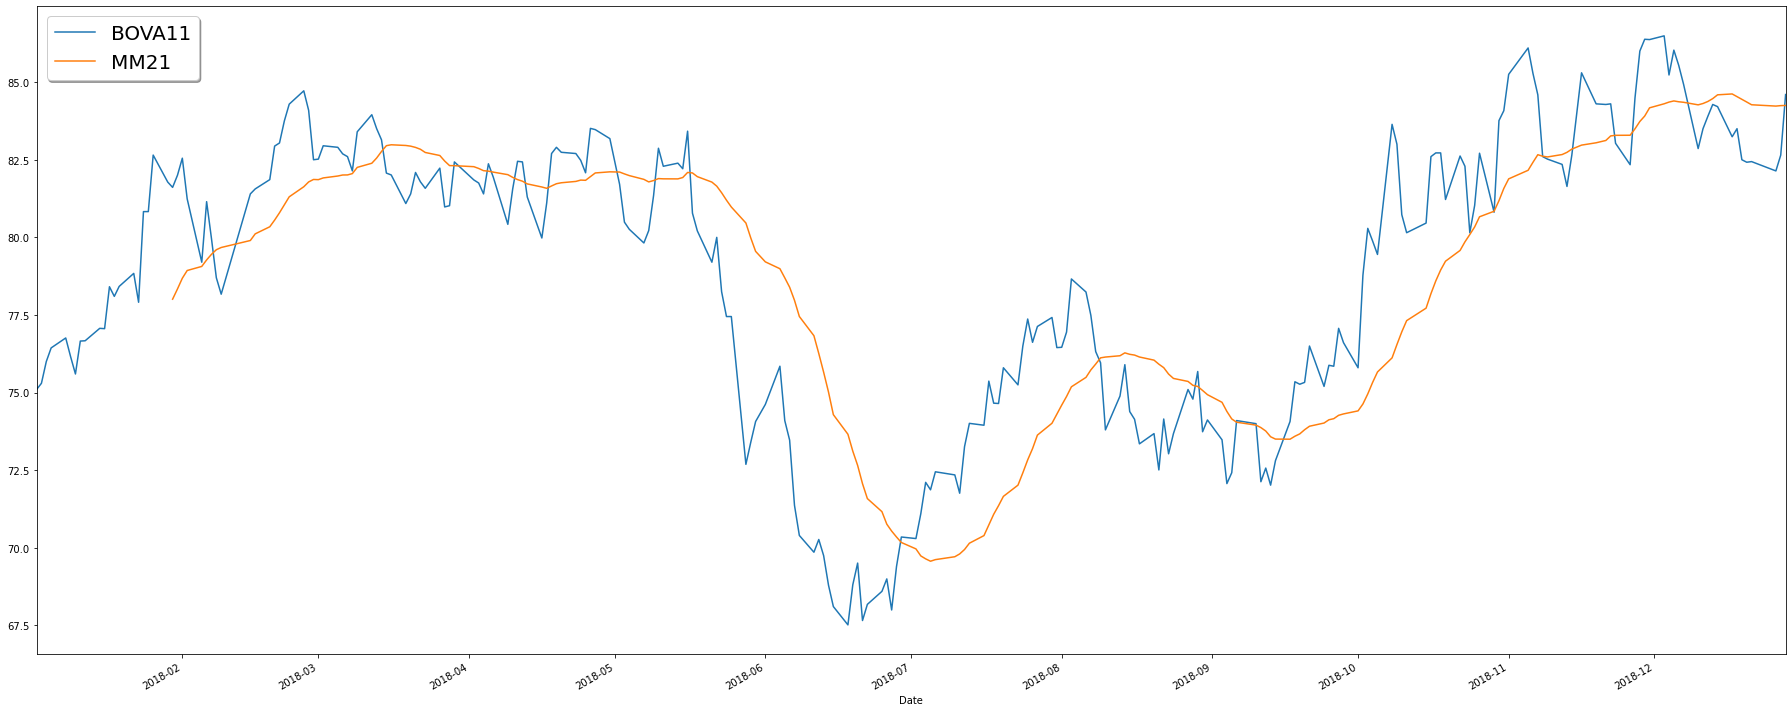

In [7]:
#selecionando um ano específico.
bova_fatiado = bova11[bova11.index.year==2018]
bova_fatiado["Adj Close"].plot(figsize=(25,10), label= "BOVA11")
bova_fatiado["Adj Close"].rolling(21).mean().plot(label ="MM21")
plt.legend(shadow=True, fontsize= 20, loc= "upper left")
plt.tight_layout();

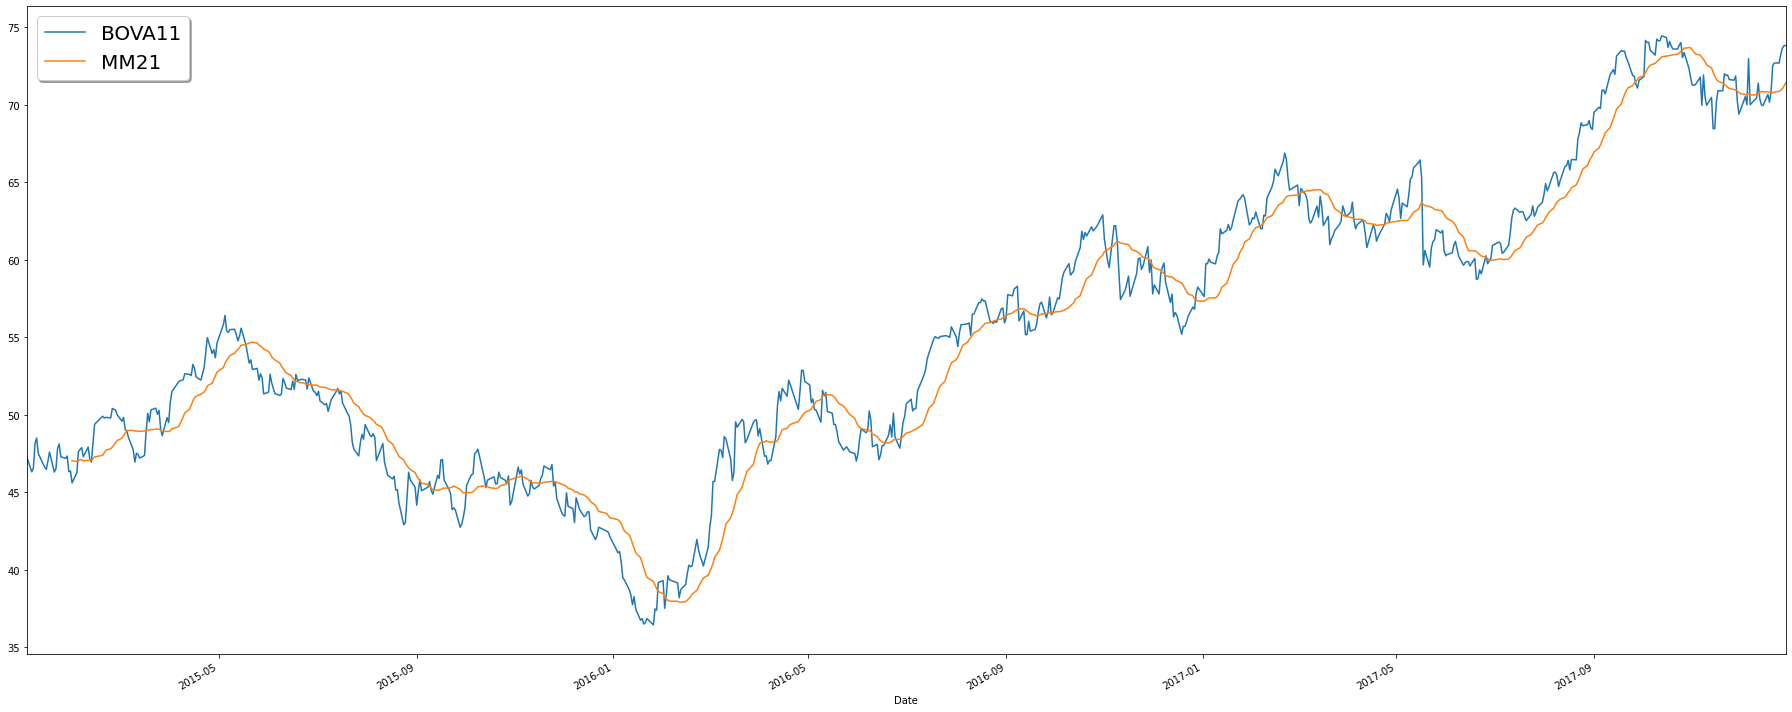

In [8]:
#selecionando um intervalo.
bova_fatiado = bova11[(bova11.index.year <= 2017) & (bova11.index.year>=2015)]
bova_fatiado["Adj Close"].plot(figsize=(25,10), label= "BOVA11")
bova_fatiado["Adj Close"].rolling(21).mean().plot(label ="MM21")
plt.legend(shadow=True, fontsize= 20, loc= "upper left")
plt.tight_layout();

In [9]:
#Com essa base eu consigo selecionar qualquer ano, mês e dia da minha base de dados.
bova_dez = bova11[(bova11.index.month == 12) & (bova11.index.day==11)]
bova_dez

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-11,58.110001,58.619999,57.810001,58.290001,58.290001,1440650
2013-12-11,49.849998,49.849998,48.810001,48.810001,48.810001,610110
2014-12-11,48.119999,48.619999,47.450001,48.369999,48.369999,1467050
2015-12-11,43.810001,44.619999,43.680000,43.919998,43.919998,3775130
2017-12-11,70.790001,70.930000,70.019997,70.440002,70.440002,2273950
2018-12-11,84.000000,84.400002,82.489998,83.500000,83.500000,4130900
2019-12-11,106.820000,107.000000,106.400002,106.750000,106.750000,4106850


#Correlação entre ativos

In [10]:
ativos = ["^BVSP", "USDBRL=X"]
carteira = wb.get_data_yahoo(ativos, start = "2007-01-01" )["Adj Close"]
carteira = carteira.dropna()

[*********************100%***********************]  2 of 2 completed


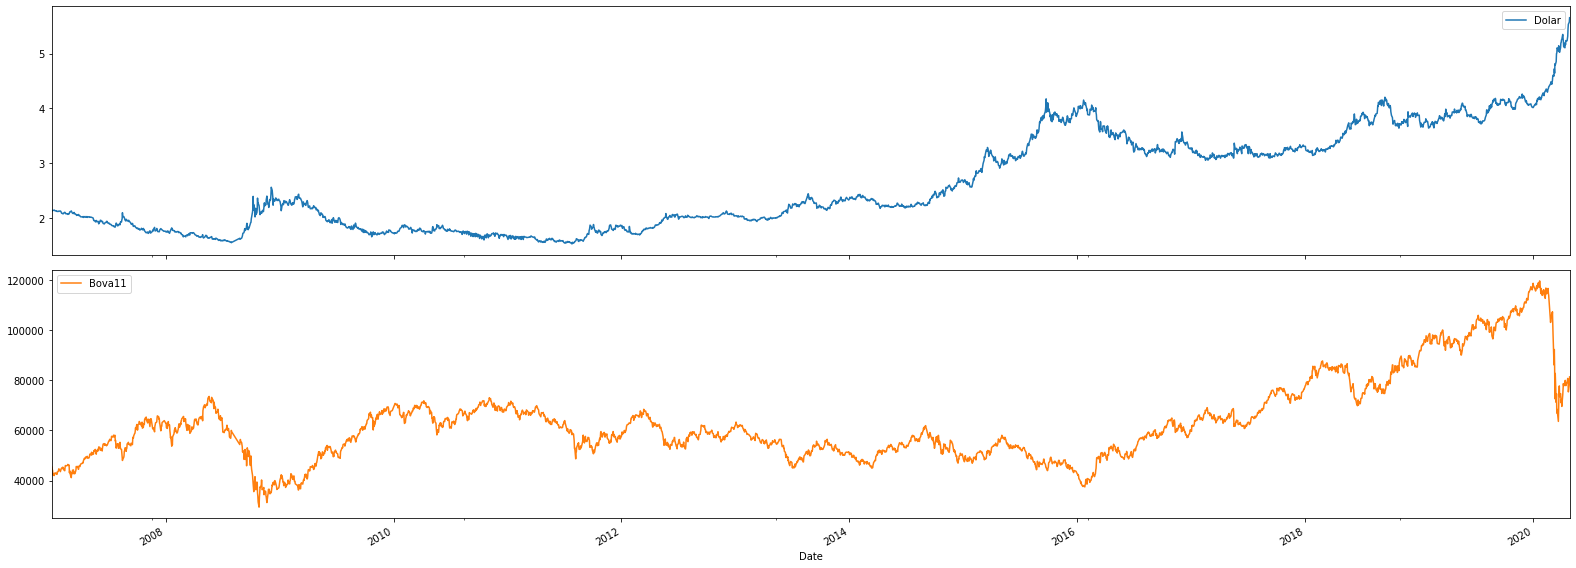

In [11]:
#plotando em gráficoa diferentes, pois os ativos estão em escalas diferentes.
carteira.columns = ["Dolar", "Bova11"]
carteira.plot(subplots=True, figsize=(22,8))
plt.tight_layout();

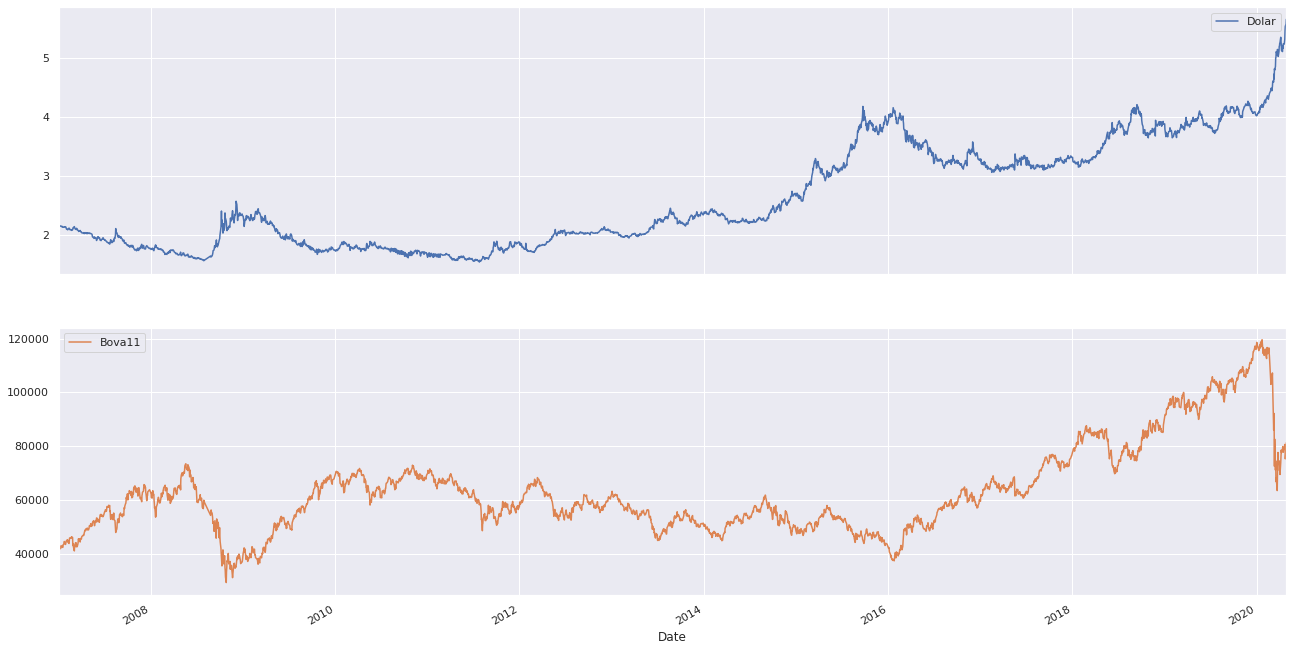

In [12]:
sns.set()
carteira.plot(subplots=True, figsize=(22,12))
plt.show();

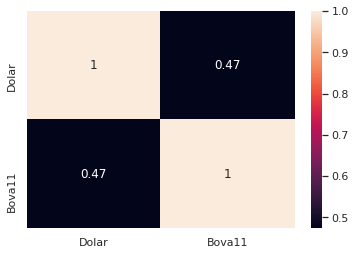

In [13]:
#Correlação entre Dolar e IBOV da minha Base inteira.
sns.heatmap(carteira.corr(), annot = True)
plt.show();

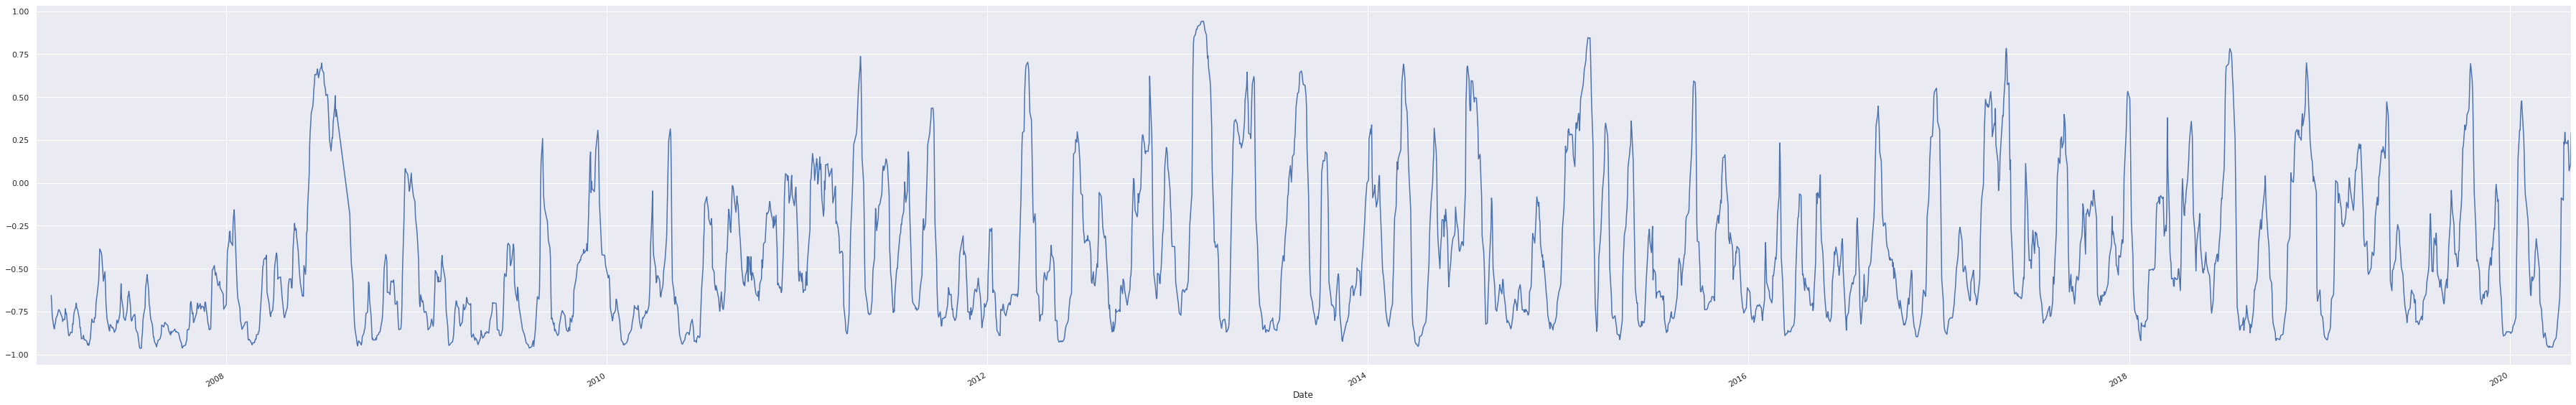

In [14]:
#Correlação entre o Dolar e Bova11 período de 21(mês) dias da minha base.
carteira["Dolar"].rolling(21).corr(carteira["Bova11"]).plot(figsize=(50,8))
plt.tight_layout();

In [0]:
carteira["bova11_dolarizado"] = carteira["Bova11"]/carteira["Dolar"]
bova_dolarizado = pd.DataFrame(carteira["bova11_dolarizado"])

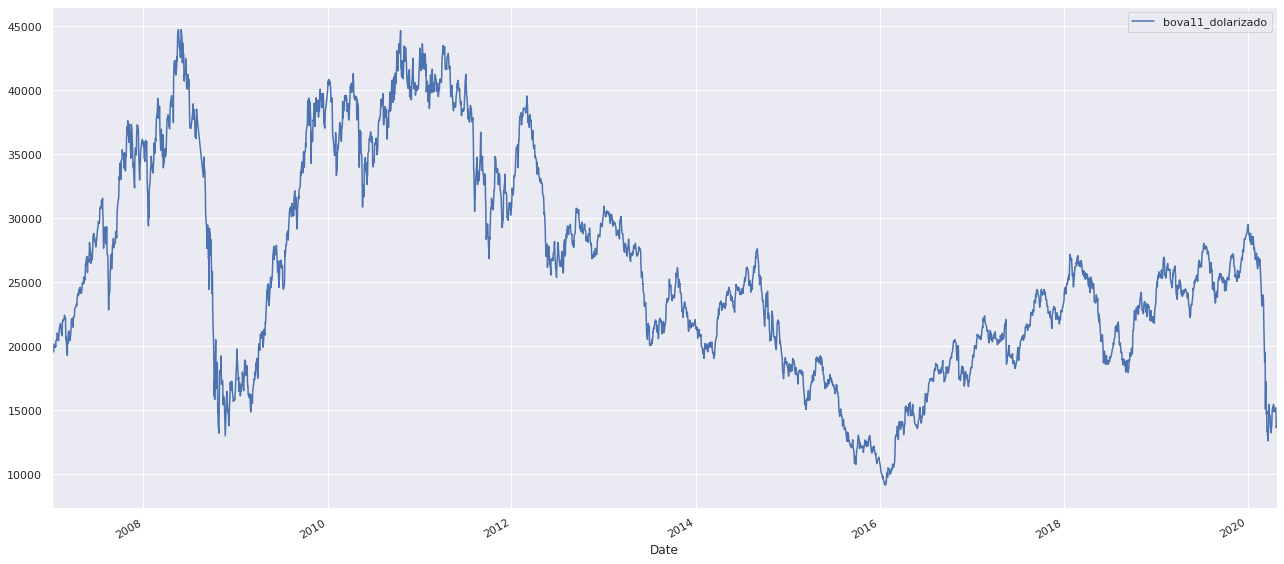

In [16]:
(pd.DataFrame(carteira["bova11_dolarizado"])).plot(figsize=(18,8))
plt.tight_layout();

In [17]:
#OBTENDO OS DADOS
tickers = ["ALPA4.SA",
            "AMAR3.SA",
            "AZUL4.SA",
            "B3SA3.SA",
            "BBAS3.SA",
            "BIDI4.SA",
            "BRML3.SA",
            "CEAB3.SA",
            "COGN3.SA",
            "EGIE3.SA",
            "ELET6.SA",
            "FLRY3.SA",
            "GNDI3.SA",
            "HAPV3.SA",
            "IGTA3.SA",
            "IRBR3.SA",
            "JBSS3.SA",
            "LAME4.SA",
            "LCAM3.SA",
            "MGLU3.SA",
            "MILS3.SA",
            "MOVI3.SA",
            "MRFG3.SA",
            "NTCO3.SA",
            "OIBR4.SA",
            "PETR3.SA",
            "RAPT4.SA",
            "SAPR11.SA",
            "SBSP3.SA",
            "SLCE3.SA",
            "SULA11.SA",
            "TUPY3.SA",
            "UGPA3.SA",
            "VALE3.SA",
            "VVAR3.SA",
            "WEGE3.SA",
            "WIZS3.SA"]

carteira = wb.get_data_yahoo(tickers, period="5y")["Adj Close"]

ibov = wb.get_data_yahoo("^BVSP", period="5y")["Adj Close"]
ibov

[*********************100%***********************]  37 of 37 completed
[*********************100%***********************]  1 of 1 completed


Date
2015-04-28    55812.000000
2015-04-29    55325.000000
2015-04-30    56229.000000
2015-05-04    57354.000000
2015-05-05    58052.000000
                  ...     
2020-04-22    80687.000000
2020-04-23    79673.000000
2020-04-24    75331.000000
2020-04-27    78239.000000
2020-04-28    81312.226562
Name: Adj Close, Length: 1236, dtype: float64

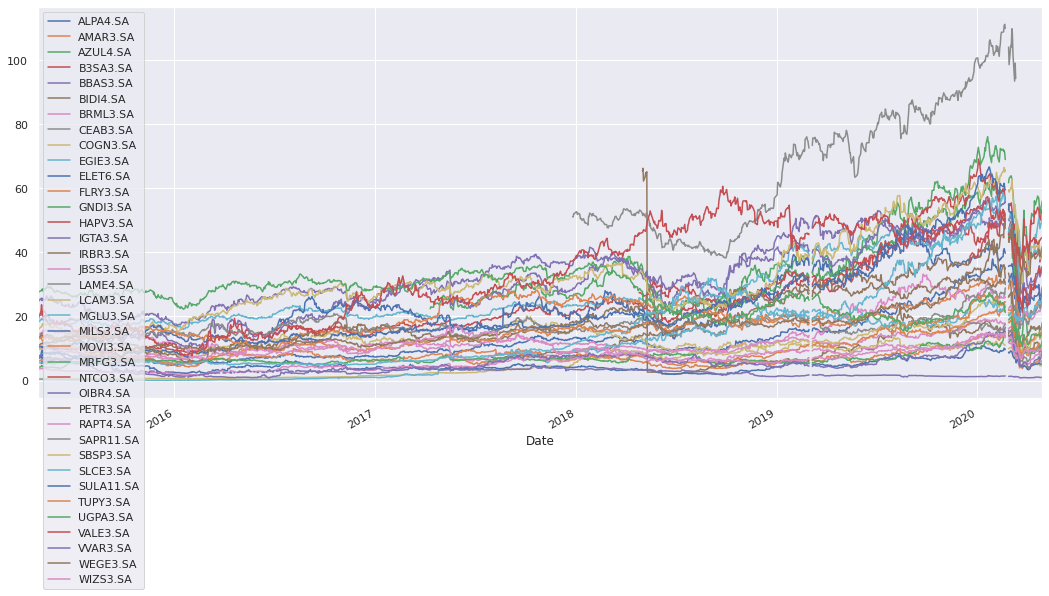

In [18]:
sns.set()
carteira.plot(figsize=(18,8))


In [19]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada

,ALPA4.SA,AMAR3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BIDI4.SA,BRML3.SA,CEAB3.SA,COGN3.SA,EGIE3.SA,ELET6.SA,FLRY3.SA,GNDI3.SA,HAPV3.SA,IGTA3.SA,IRBR3.SA,JBSS3.SA,LAME4.SA,LCAM3.SA,MGLU3.SA,MILS3.SA,MOVI3.SA,MRFG3.SA,NTCO3.SA,OIBR4.SA,PETR3.SA,RAPT4.SA,SAPR11.SA,SBSP3.SA,SLCE3.SA,SULA11.SA,TUPY3.SA,UGPA3.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-04-28,10000.000000,10000.000000,NaN,10000.000000,10000.000000,NaN,10000.000000,NaN,10000.000000,10000.000000,10000.000000,10000.000000,NaN,NaN,10000.000000,NaN,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,NaN,10000.000000,NaN,10000.000000,10000.000000,10000.000000,NaN,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,NaN
2015-04-29,9800.000639,10048.390952,NaN,9737.260769,9811.321354,NaN,9730.490122,NaN,9631.850664,9838.798925,9966.778088,9882.352985,NaN,NaN,9883.474271,NaN,10000.000000,9852.955921,10027.829358,9.802371e+03,9177.215079,NaN,9926.829918,NaN,9930.313653,10073.368577,9727.055102,NaN,10028.090117,9988.584880,9965.773684,9770.115436,10190.318653,9361.419781,NaN,10095.555947,NaN
2015-04-30,9438.094177,10146.867821,NaN,9904.456729,10045.283025,NaN,9386.400021,NaN,9434.934302,9922.179575,9756.368813,9629.413286,NaN,NaN,9392.655112,NaN,10299.002596,9888.230391,10278.522221,9.940711e+03,9341.772184,NaN,10317.073457,NaN,9878.049307,10454.880006,9875.946339,NaN,10000.000000,10288.992884,9774.515609,9827.587650,10392.625736,10044.347583,NaN,10216.615375,NaN
2015-05-04,10028.569846,10202.369907,NaN,10127.388003,9977.360355,NaN,9873.641922,NaN,9520.548956,10283.490904,10141.694026,10058.824629,NaN,NaN,9643.361545,NaN,10492.036757,10276.520384,10584.957933,1.039526e+04,9240.506459,NaN,10512.195227,NaN,9756.097784,11034.483268,10148.889946,NaN,10410.112395,10182.859069,9685.284107,9942.527786,10490.032268,10988.914218,NaN,10573.245231,NaN
2015-05-05,9619.045451,9945.623522,NaN,10175.158278,10252.830376,NaN,10226.656707,NaN,9092.467437,10464.146568,11508.861273,10294.117911,NaN,NaN,9735.168864,NaN,10619.661350,10305.913904,10584.957933,1.077075e+04,9493.670771,NaN,11585.366123,NaN,9860.627305,11489.362535,10223.346533,NaN,10404.495082,10171.066519,9479.169730,10143.678389,10520.004059,12000.001743,10037.174290,10707.055521,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-22,37641.981943,4886.046385,NaN,39975.548589,14123.248344,NaN,10202.047845,NaN,4881.865488,22223.891736,37999.123111,38011.989010,NaN,NaN,13082.830759,NaN,15464.595318,18517.523678,248926.520835,1.281878e+06,6898.733852,NaN,25195.122351,NaN,1846.689869,12920.392158,23058.282127,NaN,27133.344449,44817.178846,NaN,10878.788106,5394.541399,21775.359407,13835.316414,37679.789137,NaN
2020-04-23,37149.571469,4733.357219,NaN,39252.355277,13726.857135,NaN,10338.464315,NaN,4708.886165,22137.227847,36401.562053,37933.614970,NaN,NaN,13532.790332,NaN,15464.595318,17995.177229,229663.363357,1.254491e+06,7000.000181,NaN,25536.586611,NaN,1846.689869,13243.967341,22787.643995,NaN,26331.834554,43299.177305,NaN,10676.217226,5446.988459,22084.984092,13760.530992,36455.105680,NaN
2020-04-24,36192.107237,4504.324017,NaN,35208.173218,11891.715757,NaN,9061.990878,NaN,4430.197025,20707.272634,31608.881296,36225.034607,NaN,NaN,12228.288075,NaN,15280.156374,16553.209436,213887.502722,1.201492e+06,6620.253109,NaN,25487.805006,NaN,1707.317174,12273.964951,20811.993116,NaN,23467.517180,44130.465505,NaN,11066.353419,5053.636400,22211.880122,11928.286374,35644.786614,NaN


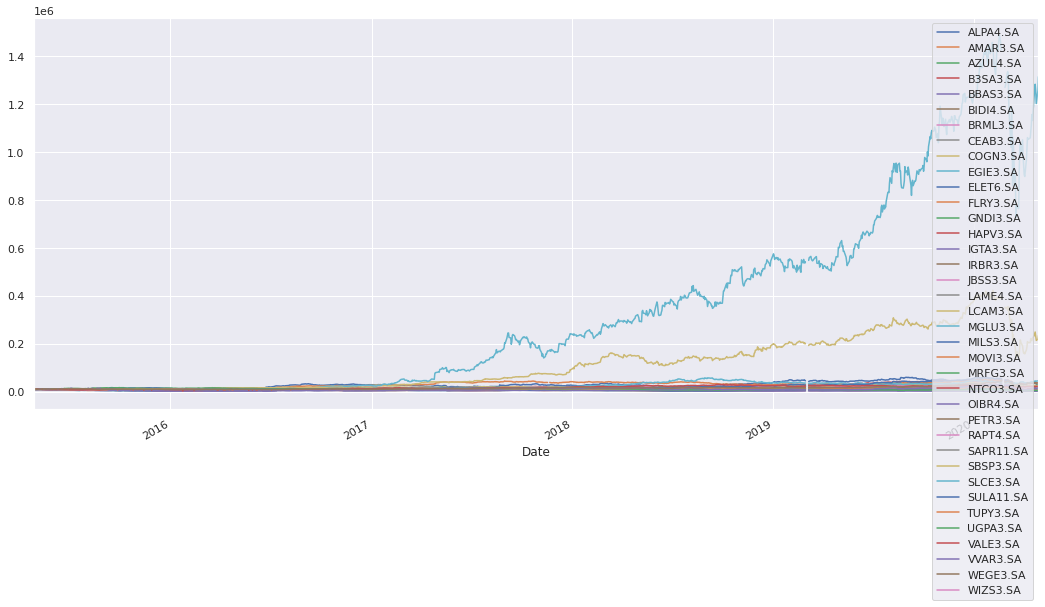

In [20]:
carteira_normalizada.plot(figsize=(18,8))

In [0]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)

In [22]:
carteira_normalizada

,ALPA4.SA,AMAR3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BIDI4.SA,BRML3.SA,CEAB3.SA,COGN3.SA,EGIE3.SA,ELET6.SA,FLRY3.SA,GNDI3.SA,HAPV3.SA,IGTA3.SA,IRBR3.SA,JBSS3.SA,LAME4.SA,LCAM3.SA,MGLU3.SA,MILS3.SA,MOVI3.SA,MRFG3.SA,NTCO3.SA,OIBR4.SA,PETR3.SA,RAPT4.SA,SAPR11.SA,SBSP3.SA,SLCE3.SA,SULA11.SA,TUPY3.SA,UGPA3.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA,saldo
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-04-28,10000.000000,10000.000000,NaN,10000.000000,10000.000000,NaN,10000.000000,NaN,10000.000000,10000.000000,10000.000000,10000.000000,NaN,NaN,10000.000000,NaN,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,NaN,10000.000000,NaN,10000.000000,10000.000000,10000.000000,NaN,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,NaN,2.700000e+05
2015-04-29,9800.000639,10048.390952,NaN,9737.260769,9811.321354,NaN,9730.490122,NaN,9631.850664,9838.798925,9966.778088,9882.352985,NaN,NaN,9883.474271,NaN,10000.000000,9852.955921,10027.829358,9.802371e+03,9177.215079,NaN,9926.829918,NaN,9930.313653,10073.368577,9727.055102,NaN,10028.090117,9988.584880,9965.773684,9770.115436,10190.318653,9361.419781,NaN,10095.555947,NaN,2.562485e+05
2015-04-30,9438.094177,10146.867821,NaN,9904.456729,10045.283025,NaN,9386.400021,NaN,9434.934302,9922.179575,9756.368813,9629.413286,NaN,NaN,9392.655112,NaN,10299.002596,9888.230391,10278.522221,9.940711e+03,9341.772184,NaN,10317.073457,NaN,9878.049307,10454.880006,9875.946339,NaN,10000.000000,10288.992884,9774.515609,9827.587650,10392.625736,10044.347583,NaN,10216.615375,NaN,2.578755e+05
2015-05-04,10028.569846,10202.369907,NaN,10127.388003,9977.360355,NaN,9873.641922,NaN,9520.548956,10283.490904,10141.694026,10058.824629,NaN,NaN,9643.361545,NaN,10492.036757,10276.520384,10584.957933,1.039526e+04,9240.506459,NaN,10512.195227,NaN,9756.097784,11034.483268,10148.889946,NaN,10410.112395,10182.859069,9685.284107,9942.527786,10490.032268,10988.914218,NaN,10573.245231,NaN,2.645712e+05
2015-05-05,9619.045451,9945.623522,NaN,10175.158278,10252.830376,NaN,10226.656707,NaN,9092.467437,10464.146568,11508.861273,10294.117911,NaN,NaN,9735.168864,NaN,10619.661350,10305.913904,10584.957933,1.077075e+04,9493.670771,NaN,11585.366123,NaN,9860.627305,11489.362535,10223.346533,NaN,10404.495082,10171.066519,9479.169730,10143.678389,10520.004059,12000.001743,10037.174290,10707.055521,NaN,2.797104e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-22,37641.981943,4886.046385,NaN,39975.548589,14123.248344,NaN,10202.047845,NaN,4881.865488,22223.891736,37999.123111,38011.989010,NaN,NaN,13082.830759,NaN,15464.595318,18517.523678,248926.520835,1.281878e+06,6898.733852,NaN,25195.122351,NaN,1846.689869,12920.392158,23058.282127,NaN,27133.344449,44817.178846,NaN,10878.788106,5394.541399,21775.359407,13835.316414,37679.789137,NaN,2.019249e+06
2020-04-23,37149.571469,4733.357219,NaN,39252.355277,13726.857135,NaN,10338.464315,NaN,4708.886165,22137.227847,36401.562053,37933.614970,NaN,NaN,13532.790332,NaN,15464.595318,17995.177229,229663.363357,1.254491e+06,7000.000181,NaN,25536.586611,NaN,1846.689869,13243.967341,22787.643995,NaN,26331.834554,43299.177305,NaN,10676.217226,5446.988459,22084.984092,13760.530992,36455.105680,NaN,1.965999e+06
2020-04-24,36192.107237,4504.324017,NaN,35208.173218,11891.715757,NaN,9061.990878,NaN,4430.197025,20707.272634,31608.881296,36225.034607,NaN,NaN,12228.288075,NaN,15280.156374,16553.209436,213887.502722,1.201492e+06,6620.253109,NaN,25487.805006,NaN,1707.317174,12273.964951,20811.993116,NaN,23467.517180,44130.465505,NaN,11066.353419,5053.636400,22211.880122,11928.286374,35644.786614,NaN,1.869675e+06


In [23]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

Date
2015-04-28    50000.000000
2015-04-29    49563.713897
2015-04-30    50373.575575
2015-05-04    51381.423350
2015-05-05    52006.736902
                  ...     
2020-04-22    72284.634129
2020-04-23    71376.227335
2020-04-24    67486.382857
2020-04-27    70091.557371
2020-04-28    72844.752529
Name: Adj Close, Length: 1236, dtype: float64

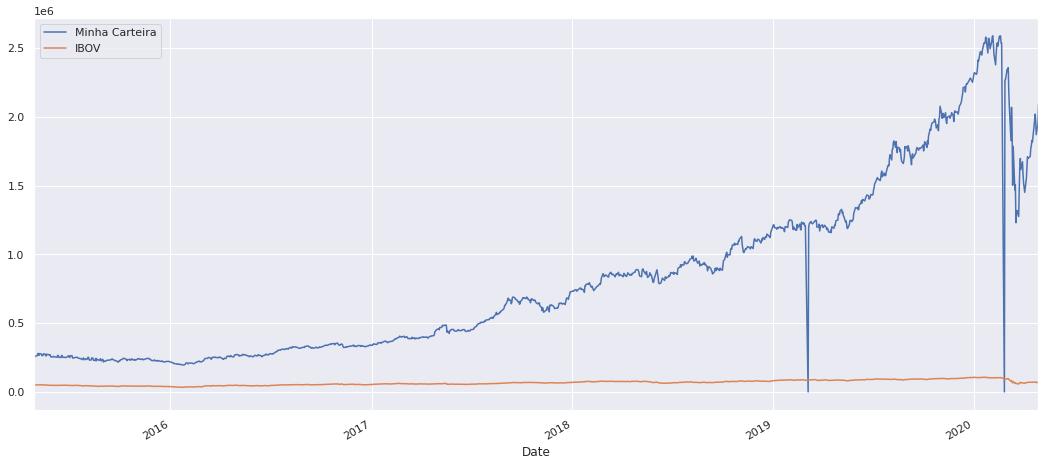

In [24]:
carteira_normalizada["saldo"].plot(figsize=(18,8), label="Minha Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend()

In [25]:
tickers = ["ALPA4.SA",
            "AMAR3.SA",
            "AZUL4.SA",
            "B3SA3.SA",
            "BBAS3.SA",
            "BIDI4.SA",
            "BRML3.SA",
            "CEAB3.SA",
            "COGN3.SA",
            "EGIE3.SA",
            "ELET6.SA",
            "FLRY3.SA",
            "GNDI3.SA",
            "HAPV3.SA",
            "IGTA3.SA",
            "IRBR3.SA",
            "JBSS3.SA",
            "LAME4.SA",
            "LCAM3.SA",
            "MGLU3.SA",
            "MILS3.SA",
            "MOVI3.SA",
            "MRFG3.SA",
            "NTCO3.SA",
            "OIBR4.SA",
            "PETR3.SA",
            "RAPT4.SA",
            "SAPR11.SA",
            "SBSP3.SA",
            "SLCE3.SA",
            "SULA11.SA",
            "TUPY3.SA",
            "UGPA3.SA",
            "VALE3.SA",
            "VVAR3.SA",
            "WEGE3.SA",
            "WIZS3.SA"]

dados_yahoo = wb.get_data_yahoo(tickers, period="5y")["Adj Close"]

#tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA ^BVSP"
#dados_yahoo = yf.download(tickers=tickers, period="5y")['Adj Close']

[*********************100%***********************]  37 of 37 completed


In [38]:
bova = ["BOVA11.SA"]

dados_bova = wb.get_data_yahoo(bova, period="5y")["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [39]:
retorno_bova = dados_bova.pct_change()
retorno_bova

Date
2015-04-28         NaN
2015-04-29   -0.009594
2015-04-30    0.017511
2015-05-04    0.022153
2015-05-05    0.010568
                ...   
2020-04-22    0.023176
2020-04-23   -0.013513
2020-04-24   -0.055316
2020-04-27    0.043226
2020-04-28    0.036537
Name: Adj Close, Length: 1242, dtype: float64

In [40]:
dados_yahoo

,ALPA4.SA,AMAR3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BIDI4.SA,BRML3.SA,CEAB3.SA,COGN3.SA,EGIE3.SA,ELET6.SA,FLRY3.SA,GNDI3.SA,HAPV3.SA,IGTA3.SA,IRBR3.SA,JBSS3.SA,LAME4.SA,LCAM3.SA,MGLU3.SA,MILS3.SA,MOVI3.SA,MRFG3.SA,NTCO3.SA,OIBR4.SA,PETR3.SA,RAPT4.SA,SAPR11.SA,SBSP3.SA,SLCE3.SA,SULA11.SA,TUPY3.SA,UGPA3.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-04-28,7.310986,13.098525,NaN,10.508924,20.434393,NaN,10.262646,NaN,10.405858,18.462112,7.887024,6.379566,NaN,NaN,26.446875,NaN,14.096715,13.592530,0.602186,0.394343,7.90,NaN,4.10,NaN,5.74,12.910664,3.694985,NaN,16.094587,5.533592,10.993094,13.328691,26.693649,19.701168,5.348631,10.859933,NaN
2015-04-29,7.164767,13.161910,NaN,10.232813,20.048840,NaN,9.986057,NaN,10.022767,18.164501,7.860822,6.304513,NaN,NaN,26.138700,NaN,14.096715,13.392660,0.603862,0.386550,7.25,NaN,4.07,NaN,5.70,13.005387,3.594132,NaN,16.139797,5.527276,10.955469,13.022285,27.201679,18.443090,NaN,10.963706,NaN
2015-04-30,6.900177,13.290900,NaN,10.408518,20.526926,NaN,9.632930,NaN,9.817859,18.318439,7.694871,6.143148,NaN,NaN,24.840637,NaN,14.518210,13.440607,0.618958,0.392005,7.38,NaN,4.23,NaN,5.67,13.497944,3.649147,NaN,16.094587,5.693509,10.745217,13.098887,27.741711,19.788538,NaN,11.095176,NaN
2015-05-04,7.331873,13.363600,NaN,10.642795,20.388130,NaN,10.132969,NaN,9.906948,18.985497,7.998778,6.417094,NaN,NaN,25.503677,NaN,14.790325,13.968391,0.637411,0.409930,7.30,NaN,4.31,NaN,5.60,14.246250,3.750000,NaN,16.754646,5.634779,10.647124,13.252088,28.001724,21.649445,NaN,11.482473,NaN
2015-05-05,7.032471,13.027300,NaN,10.692996,20.951036,NaN,10.495255,NaN,9.461493,19.319025,9.077066,6.567201,NaN,NaN,25.746479,NaN,14.970234,14.008345,0.637411,0.424737,7.50,NaN,4.75,NaN,5.66,14.833529,3.777511,NaN,16.745605,5.628253,10.420541,13.520195,28.081730,23.641405,5.368514,11.627790,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-22,27.520000,6.400000,16.309999,42.009998,28.860001,9.55,10.470000,9.80,5.080000,41.029999,29.969999,24.250000,56.849998,53.310001,34.599998,11.06,21.799999,25.170000,14.990000,50.549999,5.45,11.68,10.33,35.000000,1.06,16.681084,8.520000,NaN,43.669998,24.799999,NaN,14.500000,14.400000,42.900002,7.400000,40.919998,9.80
2020-04-23,27.160000,6.200000,16.370001,41.250000,28.049999,9.92,10.610000,9.10,4.900000,40.869999,28.709999,24.200001,54.279999,50.970001,35.790001,10.12,21.799999,24.459999,13.830000,49.470001,5.53,11.35,10.47,34.599998,1.06,17.098841,8.420000,NaN,42.380001,23.959999,NaN,14.230000,14.540000,43.509998,7.360000,39.590000,9.74
2020-04-24,26.459999,5.900000,13.990000,37.000000,24.299999,9.00,9.300000,7.94,4.610000,38.230000,24.930000,23.110001,52.040001,50.000000,32.340000,9.07,21.540001,22.500000,12.880000,47.380001,5.23,10.03,10.45,33.230000,0.98,15.846503,7.690000,NaN,37.770000,24.420000,NaN,14.750000,13.490000,43.759998,6.380000,38.709999,9.40


In [41]:
retorno = dados_yahoo.pct_change()
retorno

,ALPA4.SA,AMAR3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BIDI4.SA,BRML3.SA,CEAB3.SA,COGN3.SA,EGIE3.SA,ELET6.SA,FLRY3.SA,GNDI3.SA,HAPV3.SA,IGTA3.SA,IRBR3.SA,JBSS3.SA,LAME4.SA,LCAM3.SA,MGLU3.SA,MILS3.SA,MOVI3.SA,MRFG3.SA,NTCO3.SA,OIBR4.SA,PETR3.SA,RAPT4.SA,SAPR11.SA,SBSP3.SA,SLCE3.SA,SULA11.SA,TUPY3.SA,UGPA3.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-29,-0.020000,0.004839,NaN,-0.026274,-0.018868,NaN,-0.026951,NaN,-0.036815,-0.016120,-0.003322,-0.011765,NaN,NaN,-0.011653,NaN,0.000000,-0.014704,0.002783,-0.019763,-0.082278,NaN,-0.007317,NaN,-0.006969,0.007337,-0.027294,NaN,0.002809,-0.001142,-0.003423,-0.022988,0.019032,-0.063858,0.000000,0.009556,NaN
2015-04-30,-0.036929,0.009800,NaN,0.017171,0.023846,NaN,-0.035362,NaN,-0.020444,0.008475,-0.021111,-0.025595,NaN,NaN,-0.049661,NaN,0.029900,0.003580,0.025000,0.014113,0.017931,NaN,0.039312,NaN,-0.005263,0.037873,0.015307,NaN,-0.002801,0.030075,-0.019191,0.005882,0.019853,0.072951,0.000000,0.011991,NaN
2015-05-04,0.062563,0.005470,NaN,0.022508,-0.006762,NaN,0.051909,NaN,0.009074,0.036415,0.039495,0.044594,NaN,NaN,0.026692,NaN,0.018743,0.039268,0.029813,0.045726,-0.010840,NaN,0.018913,NaN,-0.012346,0.055439,0.027637,NaN,0.041011,-0.010315,-0.009129,0.011696,0.009373,0.094040,0.000000,0.034907,NaN
2015-05-05,-0.040836,-0.025165,NaN,0.004717,0.027610,NaN,0.035753,NaN,-0.044964,0.017568,0.134807,0.023392,NaN,NaN,0.009520,NaN,0.012164,0.002860,0.000000,0.036122,0.027397,NaN,0.102088,NaN,0.010714,0.041223,0.007336,NaN,-0.000540,-0.001158,-0.021281,0.020231,0.002857,0.092010,0.003717,0.012656,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-22,0.035365,0.103448,-0.022182,0.034984,-0.004484,0.005263,0.031527,0.060606,-0.001965,0.009845,0.026018,-0.013426,-0.011992,-0.014056,0.054878,-0.072925,0.021077,0.102497,0.066145,0.042698,0.050096,0.087523,0.079415,0.046025,0.000000,0.036254,0.058385,0.000000,0.052036,0.055319,0.000000,0.034975,0.014084,0.010363,0.122913,0.046547,0.042553
2020-04-23,-0.013081,-0.031250,0.003679,-0.018091,-0.028067,0.038743,0.013371,-0.071429,-0.035433,-0.003900,-0.042042,-0.002062,-0.045207,-0.043894,0.034393,-0.084991,0.000000,-0.028208,-0.077385,-0.021365,0.014679,-0.028253,0.013553,-0.011429,0.000000,0.025044,-0.011737,0.000000,-0.029540,-0.033871,0.000000,-0.018621,0.009722,0.014219,-0.005405,-0.032502,-0.006122
2020-04-24,-0.025773,-0.048387,-0.145388,-0.103030,-0.133690,-0.092742,-0.123468,-0.127473,-0.059184,-0.064595,-0.131661,-0.045041,-0.041267,-0.019031,-0.096396,-0.103755,-0.011927,-0.080131,-0.068691,-0.042248,-0.054250,-0.116300,-0.001910,-0.039595,-0.075472,-0.073241,-0.086698,0.000000,-0.108778,0.019199,0.000000,0.036543,-0.072215,0.005746,-0.133152,-0.022228,-0.034908


In [42]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ALPA4.SA,AMAR3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BIDI4.SA,BRML3.SA,CEAB3.SA,COGN3.SA,EGIE3.SA,ELET6.SA,FLRY3.SA,GNDI3.SA,HAPV3.SA,IGTA3.SA,IRBR3.SA,JBSS3.SA,LAME4.SA,LCAM3.SA,MGLU3.SA,MILS3.SA,MOVI3.SA,MRFG3.SA,NTCO3.SA,OIBR4.SA,PETR3.SA,RAPT4.SA,SAPR11.SA,SBSP3.SA,SLCE3.SA,SULA11.SA,TUPY3.SA,UGPA3.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-04-28,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-04-29,0.980000,1.004839,NaN,0.973726,0.981132,NaN,0.973049,NaN,0.963185,0.983880,0.996678,0.988235,NaN,NaN,0.988347,NaN,1.000000,0.985296,1.002783,0.980237,0.917722,NaN,0.992683,NaN,0.993031,1.007337,0.972706,NaN,1.002809,0.998858,0.996577,0.977012,1.019032,0.936142,1.000000,1.009556,NaN
2015-04-30,0.943809,1.014687,NaN,0.990446,1.004528,NaN,0.938640,NaN,0.943493,0.992218,0.975637,0.962941,NaN,NaN,0.939266,NaN,1.029900,0.988823,1.027852,0.994071,0.934177,NaN,1.031707,NaN,0.987805,1.045488,0.987595,NaN,1.000000,1.028899,0.977452,0.982759,1.039263,1.004435,1.000000,1.021662,NaN
2015-05-04,1.002857,1.020237,NaN,1.012739,0.997736,NaN,0.987364,NaN,0.952055,1.028349,1.014169,1.005882,NaN,NaN,0.964336,NaN,1.049204,1.027652,1.058496,1.039526,0.924051,NaN,1.051220,NaN,0.975610,1.103448,1.014889,NaN,1.041011,1.018286,0.968528,0.994253,1.049003,1.098891,1.000000,1.057325,NaN
2015-05-05,0.961905,0.994562,NaN,1.017516,1.025283,NaN,1.022666,NaN,0.909247,1.046415,1.150886,1.029412,NaN,NaN,0.973517,NaN,1.061966,1.030591,1.058496,1.077075,0.949367,NaN,1.158537,NaN,0.986063,1.148936,1.022335,NaN,1.040450,1.017107,0.947917,1.014368,1.052000,1.200000,1.003717,1.070706,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-22,3.764198,0.488605,0.728125,3.997555,1.412325,0.146070,1.020205,0.555332,0.488187,2.222389,3.799912,3.801199,2.830724,1.947718,1.308283,1.526308,1.546460,1.851752,24.892652,128.187831,0.689873,1.400240,2.519512,0.952509,0.184669,1.292039,2.305828,1.844583,2.713334,4.481718,3.747807,1.087879,0.539454,2.177536,1.383532,3.767979,0.998615
2020-04-23,3.714957,0.473336,0.730804,3.925236,1.372686,0.151730,1.033846,0.515666,0.470889,2.213723,3.640156,3.793361,2.702756,1.862224,1.353279,1.396585,1.546460,1.799518,22.966336,125.449105,0.700000,1.360678,2.553659,0.941623,0.184669,1.324397,2.278764,1.844583,2.633183,4.329918,3.747807,1.067622,0.544699,2.208498,1.376053,3.645511,0.992501
2020-04-24,3.619211,0.450432,0.624554,3.520817,1.189172,0.137658,0.906199,0.449933,0.443020,2.070727,3.160888,3.622503,2.591220,1.826785,1.222829,1.251682,1.528016,1.655321,21.388750,120.149153,0.662025,1.202432,2.548781,0.904340,0.170732,1.227396,2.081199,1.844583,2.346752,4.413047,3.747807,1.106635,0.505364,2.221188,1.192829,3.564479,0.957855


In [43]:
carteira = 10000 * retorno_acumulado
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,ALPA4.SA,AMAR3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BIDI4.SA,BRML3.SA,CEAB3.SA,COGN3.SA,EGIE3.SA,ELET6.SA,FLRY3.SA,GNDI3.SA,HAPV3.SA,IGTA3.SA,IRBR3.SA,JBSS3.SA,LAME4.SA,LCAM3.SA,MGLU3.SA,MILS3.SA,MOVI3.SA,MRFG3.SA,NTCO3.SA,OIBR4.SA,PETR3.SA,RAPT4.SA,SAPR11.SA,SBSP3.SA,SLCE3.SA,SULA11.SA,TUPY3.SA,UGPA3.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA,saldo,retorno
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-04-28,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,3.700000e+05,NaN
2015-04-29,9800.000639,10048.390952,NaN,9737.260769,9811.321354,NaN,9730.490122,NaN,9631.850664,9838.798925,9966.778088,9882.352985,NaN,NaN,9883.474271,NaN,10000.000000,9852.955921,10027.829358,9.802371e+03,9177.215079,NaN,9926.829918,NaN,9930.313653,10073.368577,9727.055102,NaN,10028.090117,9988.584880,9965.773684,9770.115436,10190.318653,9361.419781,10000.000000,10095.555947,NaN,2.662485e+05,-0.280409
2015-04-30,9438.094177,10146.867821,NaN,9904.456729,10045.283025,NaN,9386.400021,NaN,9434.934302,9922.179575,9756.368813,9629.413286,NaN,NaN,9392.655112,NaN,10299.002596,9888.230391,10278.522221,9.940711e+03,9341.772184,NaN,10317.073457,NaN,9878.049307,10454.880006,9875.946339,NaN,10000.000000,10288.992884,9774.515609,9827.587650,10392.625736,10044.347583,10000.000000,10216.615375,NaN,2.678755e+05,0.006111
2015-05-04,10028.569846,10202.369907,NaN,10127.388003,9977.360355,NaN,9873.641922,NaN,9520.548956,10283.490904,10141.694026,10058.824629,NaN,NaN,9643.361545,NaN,10492.036757,10276.520384,10584.957933,1.039526e+04,9240.506459,NaN,10512.195227,NaN,9756.097784,11034.483268,10148.889946,NaN,10410.112395,10182.859069,9685.284107,9942.527786,10490.032268,10988.914218,10000.000000,10573.245231,NaN,2.745712e+05,0.024995
2015-05-05,9619.045451,9945.623522,NaN,10175.158278,10252.830376,NaN,10226.656707,NaN,9092.467437,10464.146568,11508.861273,10294.117911,NaN,NaN,9735.168864,NaN,10619.661350,10305.913904,10584.957933,1.077075e+04,9493.670771,NaN,11585.366123,NaN,9860.627305,11489.362535,10223.346533,NaN,10404.495082,10171.066519,9479.169730,10143.678389,10520.004059,12000.001743,10037.174290,10707.055521,NaN,2.797104e+05,0.018717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-22,37641.981943,4886.046385,7281.249886,39975.548589,14123.248344,1460.704388,10202.047845,5553.324544,4881.865488,22223.891736,37999.123111,38011.989010,28307.235096,19477.178502,13082.830759,15263.075396,15464.595318,18517.523678,248926.520835,1.281878e+06,6898.733852,14002.399327,25195.122351,9525.092878,1846.689869,12920.392158,23058.282127,18445.827348,27133.344449,44817.178846,37478.074051,10878.788106,5394.541399,21775.359407,13835.316414,37679.789137,9986.147148,2.186029e+06,0.041150
2020-04-23,37149.571469,4733.357219,7308.036213,39252.355277,13726.857135,1517.297105,10338.464315,5156.658621,4708.886165,22137.227847,36401.562053,37933.614970,27027.558975,18622.243227,13532.790332,13965.851302,15464.595318,17995.177229,229663.363357,1.254491e+06,7000.000181,13606.783694,25536.586611,9416.234259,1846.689869,13243.967341,22787.643995,18445.827348,26331.834554,43299.177305,37478.074051,10676.217226,5446.988459,22084.984092,13760.530992,36455.105680,9925.007045,2.128468e+06,-0.026331
2020-04-24,36192.107237,4504.324017,6245.535718,35208.173218,11891.715757,1376.580024,9061.990878,4499.326157,4430.197025,20707.272634,31608.881296,36225.034607,25912.200174,18267.846558,12228.288075,12516.824949,15280.156374,16553.209436,213887.502722,1.201492e+06,6620.25310

Start date,2015-04-28
End date,2020-04-28
Total months,59
,Backtest
Annual return,43.5%
Cumulative returns,494.3%
Annual volatility,35.5%
Sharpe ratio,1.20
Calmar ratio,0.84
Stability,0.97
Max drawdown,-51.8%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,51.85,2020-02-05,2020-03-18,NaT,NaN
1,45.34,2015-04-28,2016-01-26,2017-01-20,454
2,15.78,2017-09-15,2017-11-10,2017-12-27,74
3,12.82,2017-05-16,2017-05-22,2017-07-12,42
4,12.60,2018-05-09,2018-06-08,2018-07-17,50


Stress Events,mean,min,max
Fall2015,-0.25%,-2.55%,2.53%
New Normal,0.17%,-28.04%,17.88%


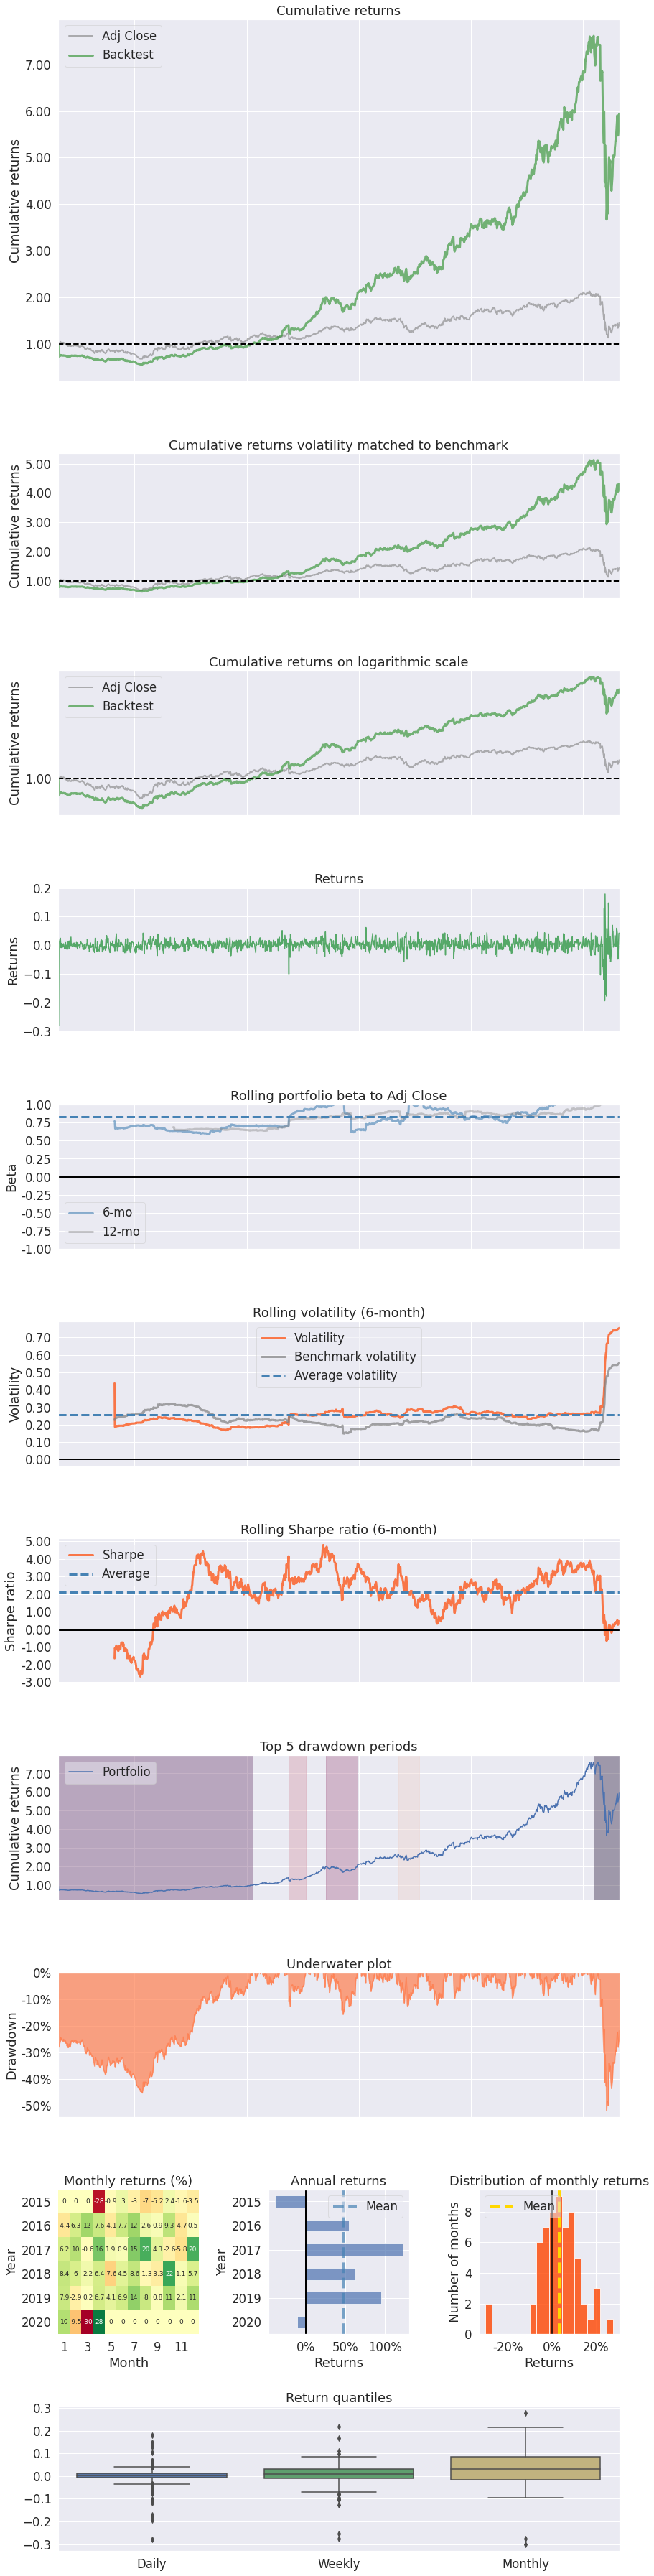

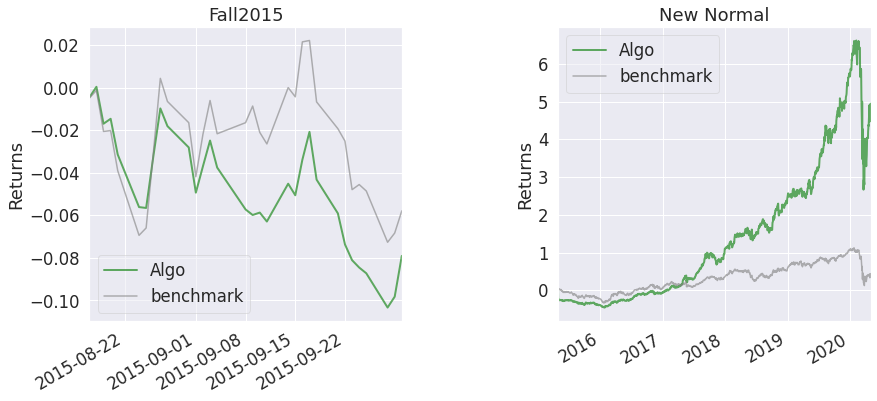

In [44]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno_bova)


(0.1, 1.4)

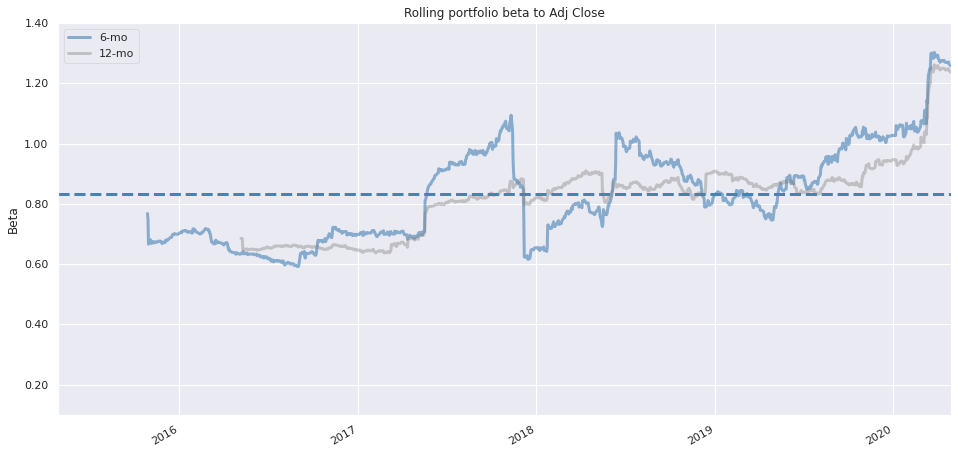

In [47]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno_bova, ax=ax1)
plt.ylim((0.1, 1.4))